In [ ]:
#ML_EXAM_ALL_ALGORITHMS_JUN19


# **1.Implement Linear Regression or MLR (any one) **

---



# **LINEAR REGRESSION**

---

Linear Regression (LR) is a statistical method used to model the relationship between a dependent variable (often called the target or response variable) and one or more independent variables (also known as predictors or features). The goal of linear regression is to find the best-fitting linear relationship between the dependent and independent variables.

IMPORT LIBRARIES

---



In [602]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)


Loar data and Read

---



In [603]:
df = pd.read_csv('/content/Mobile-Price-Prediction-cleaned_data.csv')
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [604]:
df.shape

(807, 8)

About dataset

---

This dataset regarding diamond price and its different features has 53940 rows and 8 columns. Each column specify a different variable whether categorical or numerical. This dataset can be used for regression modelling purpose.This dataset is about the diamond prices and the different variables associated with each diamond. This dataset has a total of 8 variables.

In [605]:
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

There are no null values

In [606]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 807 entries, 0 to 806
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Ratings        807 non-null    float64
 1   RAM            807 non-null    float64
 2   ROM            807 non-null    float64
 3   Mobile_Size    807 non-null    float64
 4   Primary_Cam    807 non-null    int64  
 5   Selfi_Cam      807 non-null    float64
 6   Battery_Power  807 non-null    int64  
 7   Price          807 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 50.6 KB


In [607]:
df.columns

Index(['Ratings', 'RAM', 'ROM', 'Mobile_Size', 'Primary_Cam', 'Selfi_Cam',
       'Battery_Power', 'Price'],
      dtype='object')

Descriptive statistics

---



In [608]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Ratings,807.0,4.112639,0.367830,2.8,3.9,4.10,4.4,4.8
RAM,807.0,5.941760,2.056359,0.0,6.0,6.00,6.0,12.0
ROM,807.0,64.390335,53.868626,2.0,32.0,32.00,64.0,256.0
Mobile_Size,807.0,5.620660,3.957409,2.0,4.5,4.77,6.3,44.0
Primary_Cam,807.0,47.821561,11.155916,5.0,48.0,48.00,48.0,64.0
Selfi_Cam,807.0,8.868649,4.547254,0.0,8.0,8.00,12.0,23.0
Battery_Power,807.0,3278.859975,937.628801,1020.0,3000.0,3000.00,3800.0,6000.0
Price,807.0,14269.167286,23092.739983,479.0,984.0,1699.00,18994.5,153000.0


In [609]:
# Customize the appearance using a color palette
import matplotlib.pyplot as plt
styled_summary = df.describe().T.style.background_gradient(cmap=("Set1"))

# Display the styled summary
styled_summary

,count,mean,std,min,25%,50%,75%,max
Ratings,807.000000,4.112639,0.367830,2.800000,3.900000,4.100000,4.400000,4.800000
RAM,807.000000,5.941760,2.056359,0.000000,6.000000,6.000000,6.000000,12.000000
ROM,807.000000,64.390335,53.868626,2.000000,32.000000,32.000000,64.000000,256.000000
Mobile_Size,807.000000,5.620660,3.957409,2.000000,4.500000,4.770000,6.300000,44.000000
Primary_Cam,807.000000,47.821561,11.155916,5.000000,48.000000,48.000000,48.000000,64.000000
Selfi_Cam,807.000000,8.868649,4.547254,0.000000,8.000000,8.000000,12.000000,23.000000
Battery_Power,807.000000,3278.859975,937.628801,1020.000000,3000.000000,3000.000000,3800.000000,6000.000000
Price,807.000000,14269.167286,23092.739983,479.000000,984.000000,1699.000000,18994.500000,153000.000000


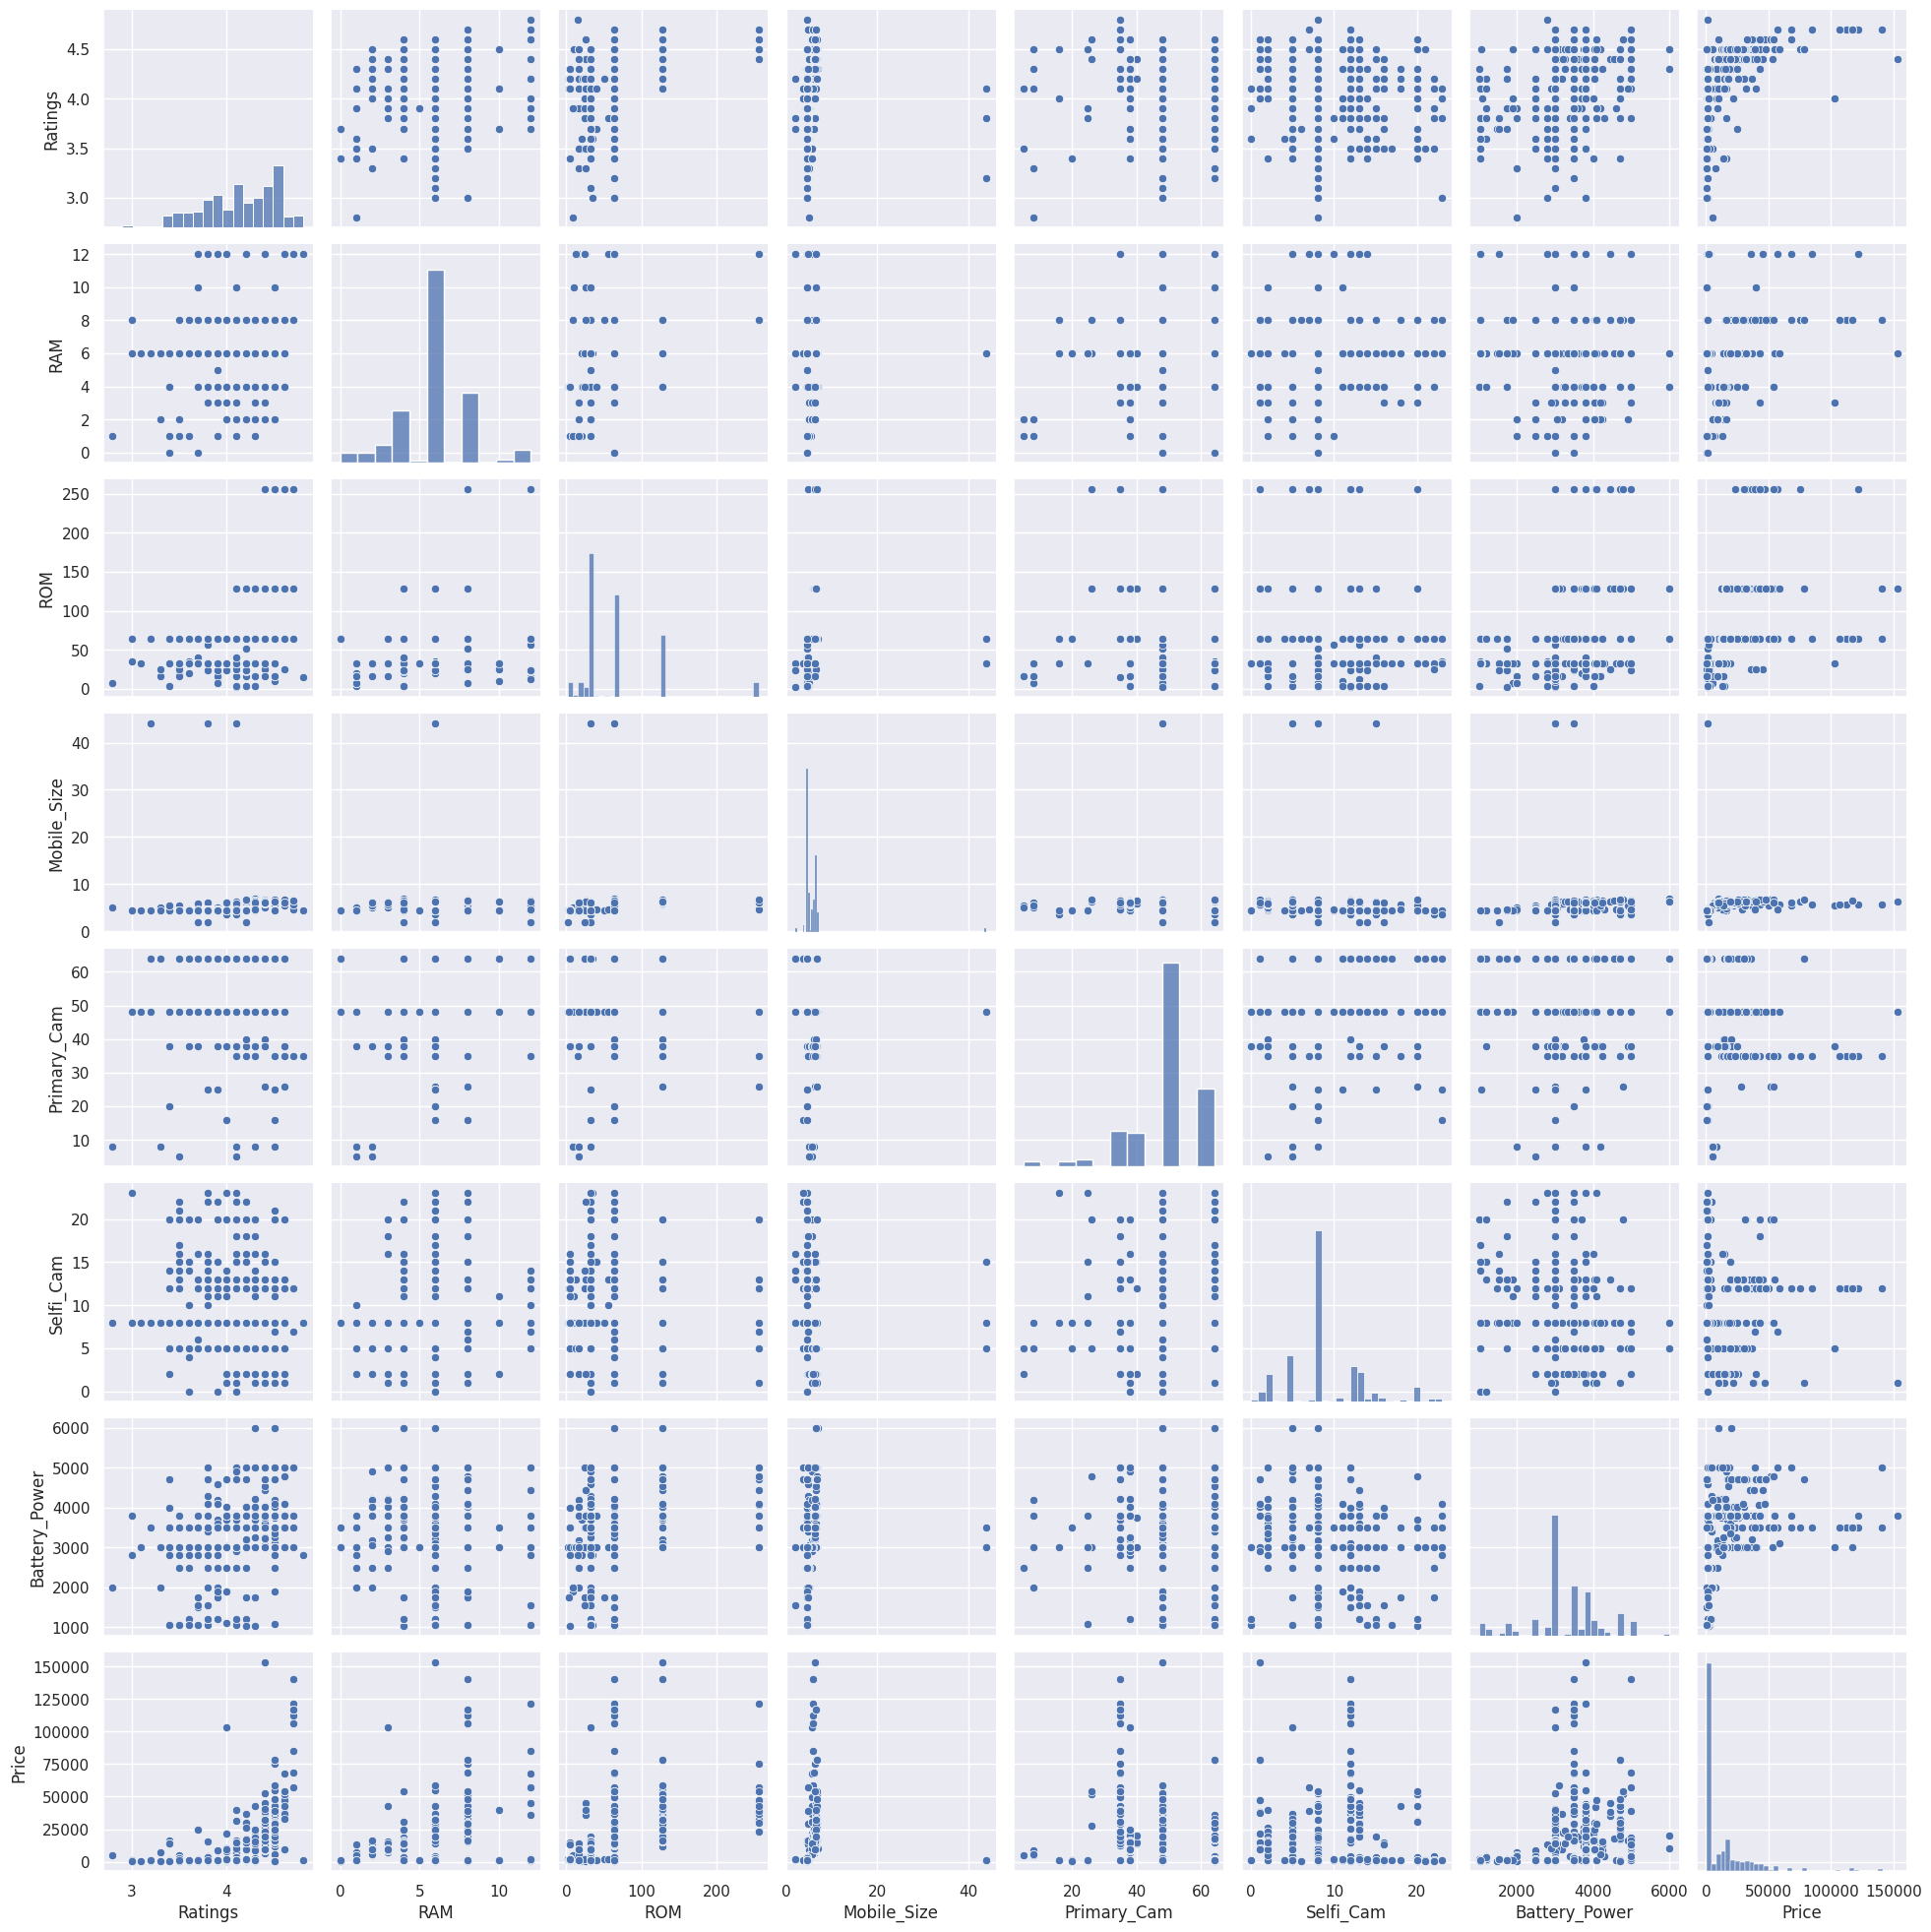

In [610]:
sns.pairplot(data = df)

Boxplots

---



<Axes: >

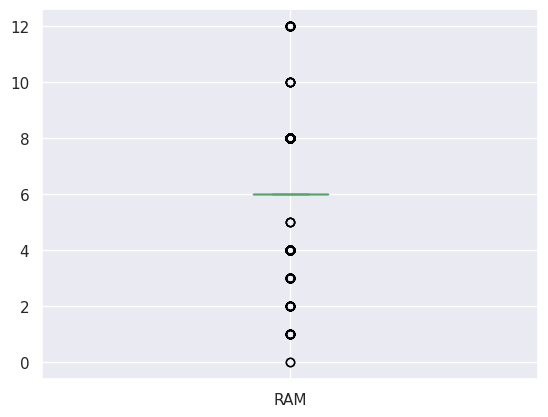

In [611]:
df['RAM'].plot.box()

There are outliers in carat from upper(Q)

<Axes: >

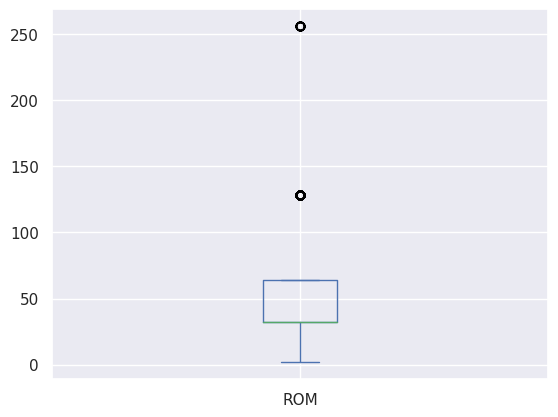

In [612]:
df['ROM'].plot.box()

<Axes: >

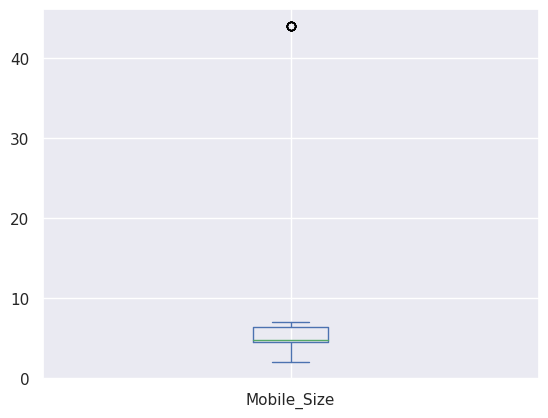

In [613]:
df['Mobile_Size'].plot.box()

<Axes: >

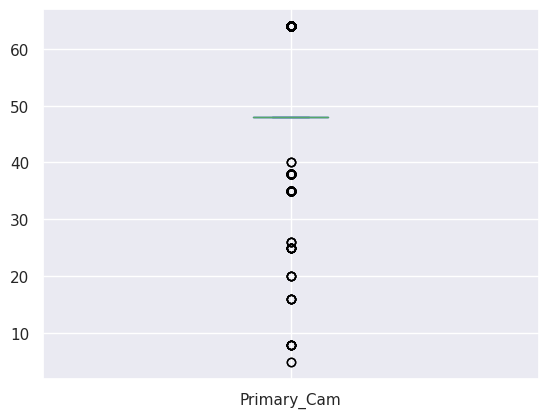

In [614]:
df['Primary_Cam'].plot.box()

There are outliers in all columns so we need to handle it first.

We'll use the IQR (Interquartile Range) method to detect outliers and remove them.

In [344]:
"""
# Function to remove outliers
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Remove outliers for each numerical column
for col in ['RAM', 'price', 'ROM', 'Primary_Cam', 'Mobile_Size']:
    df = remove_outliers(df, col)

print("Data shape after outlier removal:", df.shape)
"""


'\n# Function to remove outliers\ndef remove_outliers(df, column):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - 1.5 * IQR\n    upper_bound = Q3 + 1.5 * IQR\n    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n\n# Remove outliers for each numerical column\nfor col in [\'carat\', \'price\', \'x\', \'y\', \'z\']:\n    df = remove_outliers(df, col)\n\nprint("Data shape after outlier removal:", df.shape)\n'

<Axes: >

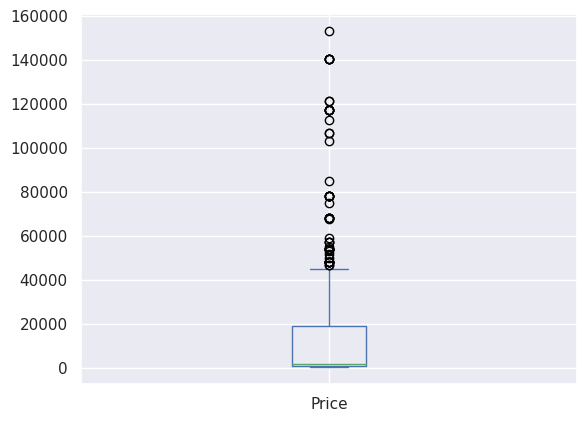

In [616]:
df['Price'].plot.box()

we will convert categorical values to numerical

In [617]:
df.duplicated().sum()

264

In [618]:
df.drop_duplicates(inplace = True)

In [619]:
df.duplicated().sum()

0

Now there are no duplicates.

In [620]:
df.isnull().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [621]:
df['Price'].value_counts()

Price
649      17
1199     15
1099     14
799      13
1299     10
         ..
1540      1
1480      1
1300      1
870       1
84900     1
Name: count, Length: 241, dtype: int64

In [622]:
df['RAM'].value_counts()

RAM
6.0     309
8.0      81
4.0      69
3.0      27
12.0     22
2.0      15
1.0      12
10.0      4
5.0       2
0.0       2
Name: count, dtype: int64

In [623]:
df['ROM'].value_counts()

ROM
32.0     235
64.0     153
128.0     69
256.0     17
16.0      17
4.0       14
24.0      10
25.0       6
20.0       3
12.0       3
40.0       3
56.0       2
3.0        2
35.0       2
8.0        2
22.0       1
2.0        1
15.0       1
10.0       1
51.0       1
Name: count, dtype: int64

In [624]:
df['Primary_Cam'].value_counts()

Primary_Cam
48    311
64    111
38     49
35     44
25      7
8       5
20      4
16      4
40      3
26      3
5       2
Name: count, dtype: int64

convert categorical to numerical values

---



In [625]:
df.dtypes

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [626]:
columns = ['Mobile_Size','Selfi_Cam','Battery_Power']
for col in columns:
  print(df[col].value_counts())

Mobile_Size
4.500     128
4.540     106
4.770      42
6.500      20
4.700      17
4.400      13
3.700      13
6.300      13
6.200      12
4.580      11
6.400      11
5.500      10
6.700       9
5.800       9
6.670       8
5.700       8
44.000      7
5.000       7
6.220       7
6.530       7
6.390       6
5.990       6
6.100       6
6.260       6
6.440       6
6.410       6
2.000       6
6.350       4
6.380       4
6.180       4
6.600       3
6.590       3
6.000       3
6.080       3
5.400       3
4.800       2
4.570       2
6.550       2
4.520       2
4.503       1
5.840       1
6.280       1
7.000       1
5.600       1
6.520       1
5.900       1
5.650       1
Name: count, dtype: int64
Selfi_Cam
8.0     239
5.0      72
12.0     52
2.0      42
13.0     34
20.0     21
15.0     20
1.0      10
16.0      8
11.0      8
14.0      7
22.0      7
23.0      6
7.0       4
18.0      3
0.0       3
10.0      2
21.0      2
17.0      1
6.0       1
4.0       1
Name: count, dtype: int64
Battery_Power
30

In [628]:
df.isna().sum()

Ratings          0
RAM              0
ROM              0
Mobile_Size      0
Primary_Cam      0
Selfi_Cam        0
Battery_Power    0
Price            0
dtype: int64

In [357]:
#columns = ['cut','color','clarity']
#df = pd.get_dummies(df, columns = columns, drop_first = True)


In [358]:
df.dtypes

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [359]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()

In [360]:
#df['cut'] = le.fit_transform(df['cut'])
#df['color'] = le.fit_transform(df['color'])
#df['clarity'] = le.fit_transform(df['clarity'])

In [361]:
df.dtypes

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [629]:
df.head()

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,Price
0,4.3,4.0,128.0,6.00,48,13.0,4000,24999
1,3.4,6.0,64.0,4.50,48,12.0,4000,15999
2,4.3,4.0,4.0,4.50,64,16.0,4000,15000
3,4.4,6.0,64.0,6.40,48,15.0,3800,18999
4,4.5,6.0,128.0,6.18,35,15.0,3800,18999


In [363]:
# Apply log transformation to the target variable
#df['log_price'] = np.log(df['price'])
#df.carat = np.log(df.carat)

In [630]:
df.dtypes

Ratings          float64
RAM              float64
ROM              float64
Mobile_Size      float64
Primary_Cam        int64
Selfi_Cam        float64
Battery_Power      int64
Price              int64
dtype: object

In [631]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_columns = ['Ratings','RAM','ROM','Mobile_Size','Selfi_Cam']
df[scaler_columns] = scaler.fit_transform(df[scaler_columns])

SPLIT DATA INTO X AND Y INDEPENDENT AND DEPENDENT VARIABLES(Target)

In [632]:

x = df.drop(['Price'], axis =1)
#x = df.drop(columns=['price', 'log_price'])
y = df['Price']



In [633]:
# Display the first few rows of X and y
print("Features (X):")
print(x.head(), x.shape)

print("\nTarget Variable (y):")
print(y.head(), y.shape)

Features (X):
    Ratings       RAM       ROM  Mobile_Size  Primary_Cam  Selfi_Cam  \
0  0.640661 -0.931358  1.427017     0.088806           48   0.827332   
1 -1.834368  0.038397  0.114025    -0.245963           48   0.616420   
2  0.640661 -0.931358 -1.116904    -0.245963           64   1.460066   
3  0.915665  0.038397  0.114025     0.178078           48   1.249154   
4  1.190668  0.038397  1.427017     0.128979           35   1.249154   

   Battery_Power  
0           4000  
1           4000  
2           4000  
3           3800  
4           3800   (543, 7)

Target Variable (y):
0    24999
1    15999
2    15000
3    18999
4    18999
Name: Price, dtype: int64 (543,)


In [634]:
x

,Ratings,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power
0,0.640661,-0.931358,1.427017,0.088806,48,0.827332,4000
1,-1.834368,0.038397,0.114025,-0.245963,48,0.616420,4000
2,0.640661,-0.931358,-1.116904,-0.245963,64,1.460066,4000
3,0.915665,0.038397,0.114025,0.178078,48,1.249154,3800
4,1.190668,0.038397,1.427017,0.128979,35,1.249154,3800
...,...,...,...,...,...,...,...
781,0.090655,1.008152,0.114025,-0.237036,64,-0.227225,2500
795,-0.734355,-0.931358,0.114025,-0.237036,48,1.249154,1200
796,0.090655,-0.931358,-0.378346,-0.185705,48,1.249154,3000
802,-0.734355,0.038397,-0.542470,-0.237036,48,0.616420,2800


In [635]:
y

0      24999
1      15999
2      15000
3      18999
4      18999
       ...  
781     1390
795     3580
796     1080
802     1299
806      799
Name: Price, Length: 543, dtype: int64

In [636]:
x.shape

(543, 7)

In [637]:
y.shape

(543,)

In [372]:
# Ensure Y is one-dimensional
#y = y.values

Linear Regression Model Building

---



In [638]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=101)


In [639]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((407, 7), (407,), (136, 7), (136,))

In [640]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [641]:
y_pred_train = lr.predict(x_train)
y_pred_test = lr.predict(x_test)

In [642]:
from sklearn.metrics import r2_score, mean_absolute_error,mean_squared_error

In [643]:
print("R2_Score :", r2_score(y_test, y_pred_test))
print("*****************************")
print("MAE :", mean_absolute_error(y_test, y_pred_test))
print("*****************************")
print("MSE :", mean_squared_error(y_test, y_pred_test))
print("*****************************")
print("RMSE :", np.sqrt(mean_squared_error(y_test, y_pred_test)))

R2_Score : 0.45237472516422295
*****************************
MAE : 8881.192227237772
*****************************
MSE : 205859159.2984838
*****************************
RMSE : 14347.792837174775


# 2.Implement Decision Tree with Hyper Parameter Tuning (Mandatory)

In [480]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [481]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [482]:
iris = load_iris()

In [483]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [484]:
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target

In [485]:
df['species'] = iris.target_names[iris.target]  # Use species names directly

In [486]:
df['species'] = iris.target

In [487]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [488]:
df['species'].value_counts()

species
0    50
1    50
2    50
Name: count, dtype: int64

In [489]:
# Display the first few rows of the dataframe
print(df.head())
print("\nDataset description:\n", df.describe().T)
print("\nUnique species:", df['species'].unique())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  

Dataset description:
                    count      mean       std  min  25%   50%  75%  max
sepal length (cm)  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal width (cm)   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal length (cm)  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal width (cm)   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5
species            150.0  1.000000  0.819232  0.0  0.0  1.00  2.0  2.

In [490]:
x = df.drop('species', axis =1)
y = df['species']

In [491]:
x.shape,y.shape

((150, 4), (150,))

In [492]:
x.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [493]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [494]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [495]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state =102)

In [496]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [497]:
y_pred_train_dt = dt.predict(x_train)
y_pred_test_dt = dt.predict(x_test)

In [498]:
#Classification Report with Train and Test Data
print("Classification report of Train:", classification_report(y_train,y_pred_train_dt))
print("***********************************************"*10)
print("Classification Report of Test:", classification_report(y_test,y_pred_test_dt))

Classification report of Train:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       1.00      1.00      1.00        42
           2       1.00      1.00      1.00        39

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120

**************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************
Classification Report of Test:               precision    recall  f1-score   support

           0       1.00      1

In [499]:
print("Training Accuracy of Decision  Tree is {:.2f}%".format(accuracy_score(y_train, y_pred_train_dt)*100))
print("***************"*10)
print("Test Accuracy of Decision Tree is {:.2f}%".format(accuracy_score(y_test, y_pred_test_dt)*100))

Training Accuracy of Logistic Regression is 100.00%
******************************************************************************************************************************************************
Test Accuracy of Logistic Regressione is 93.33%


In [500]:
print("confusion_matrix:\n",confusion_matrix(y_test, y_pred_test_dt))

confusion_matrix:
 [[11  0  0]
 [ 0  6  2]
 [ 0  0 11]]


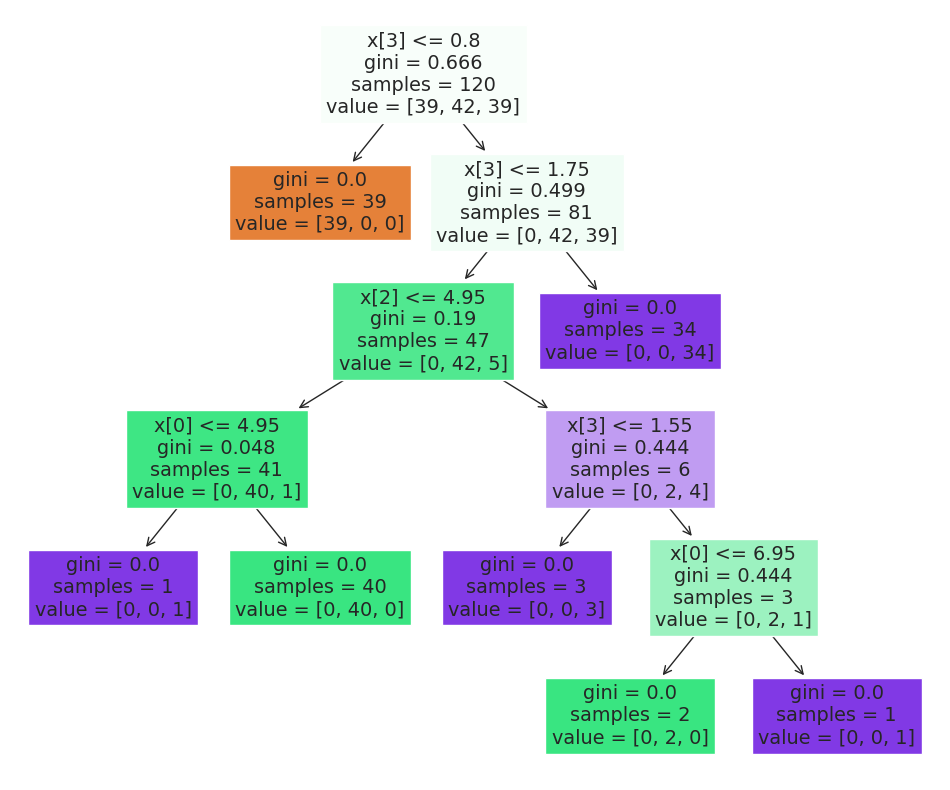

In [506]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(dt.fit(x_train,y_train),filled=True)
plt.show()

# **Hyperparameter Tuning**

---



In [501]:
# Create and train the Decision Tree Classifier with Hyperparameter tuning
dt = DecisionTreeClassifier()
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Hyperparameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [502]:
# Get the best model
best_model = grid_search.best_estimator_

# Make predictions
y_pred_test_dt1 = best_model.predict(x_test)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_test_dt1)

# Print the confusion matrix
print("Confusion Matrix of Test data:")
print(conf_matrix)

Confusion Matrix of Test data:
[[11  0  0]
 [ 0  7  1]
 [ 0  0 11]]


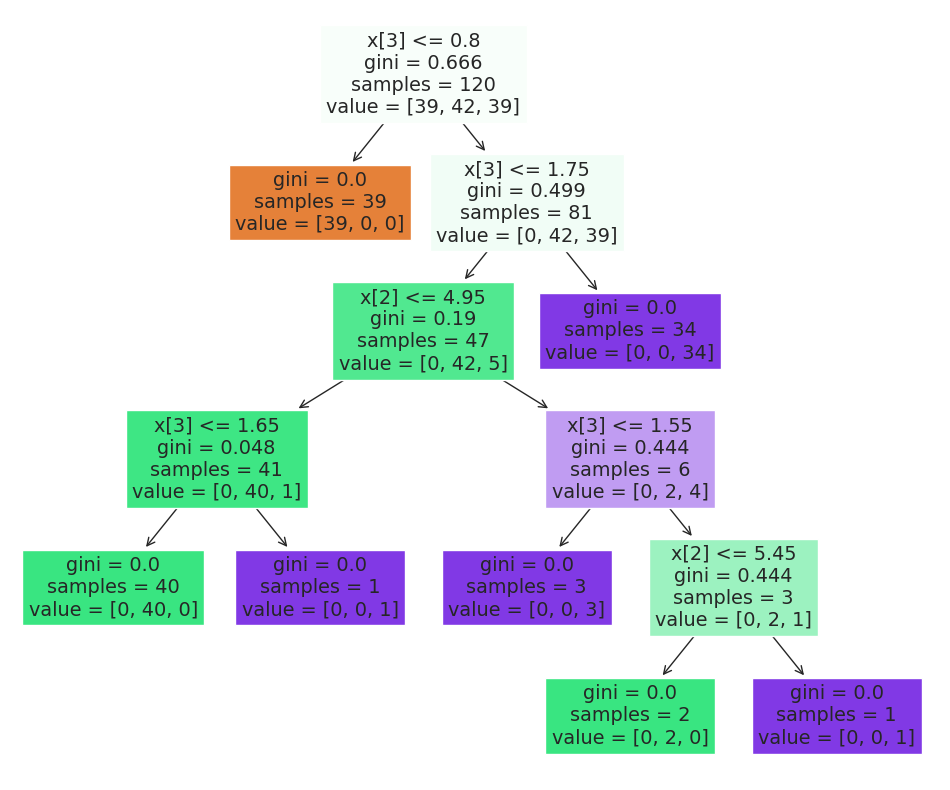

In [503]:
from sklearn import tree
plt.figure(figsize=(12,10))
tree.plot_tree(best_model,filled=True)
plt.show()

In [509]:
!pip install scikit-plot

In [510]:
import scikitplot as skplt

<Figure size 800x600 with 0 Axes>

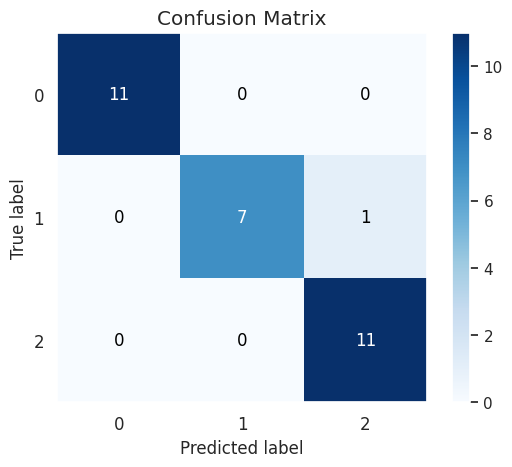

In [513]:
# Plot Confusion Matrix using scikit-plot
plt.figure(figsize=(8, 6))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_test_dt1, title='Confusion Matrix')
plt.show()

# **3.Implement Naive Bayes (Mandatory) **

---





In [514]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
import seaborn as sns; sns.set(color_codes=True)
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [515]:
iris = load_iris()

In [516]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [517]:
from sklearn.naive_bayes import GaussianNB

In [518]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [519]:
gnb = GaussianNB()

In [520]:
gnb.fit(df,iris.target)

GaussianNB()

In [521]:
gnb.score(df,iris.target)

0.96

In [524]:
# Convert to DataFrame
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target  # Use integer target labels


In [525]:
# Prepare features and target
X = df.drop(columns=['species'])
y = df['species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy on the test set: 1.0

Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



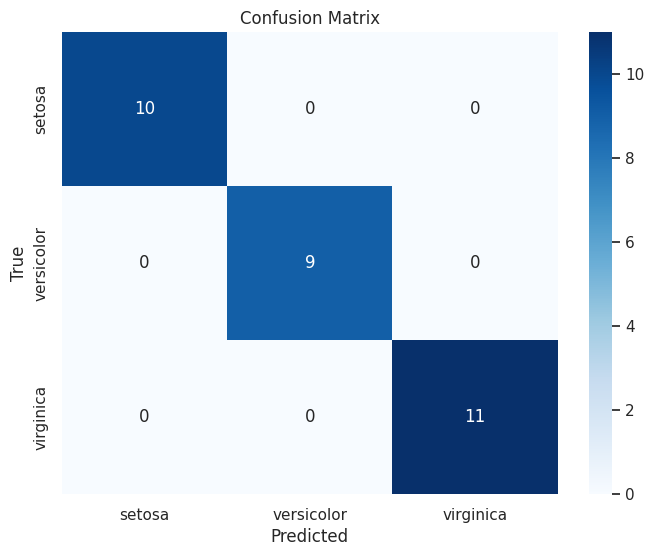

In [526]:
# Create and train the Gaussian Naive Bayes model
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Evaluate the model using the test set
accuracy = gnb.score(X_test, y_test)
print("Accuracy on the test set:", accuracy)

# Make predictions
y_pred = gnb.predict(X_test)

# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))

# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=range(3))

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **4.Implement Support Vector Machine (find SVM metrics till, Mandatory) **

---



In [527]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [528]:
# Load Iris dataset
iris = load_iris()

In [529]:
# Prepare features and target
X = df.drop(columns=['species'])
y = df['species']

In [530]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [531]:
# Create and train the Support Vector Machine model
svm = SVC(kernel='linear')  # You can experiment with other kernels like 'rbf' or 'poly'
svm.fit(X_train, y_train)

SVC(kernel='linear')

In [532]:
# Make predictions
y_pred = svm.predict(X_test)

In [533]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on the test set:", accuracy)

Accuracy on the test set: 1.0


In [534]:
# Print classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=iris.target_names))



Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [536]:
# Calculate and plot confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=range(3))
print("Confusion Matrix of Test Data:", conf_matrix)

Confusion Matrix of Test Data: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


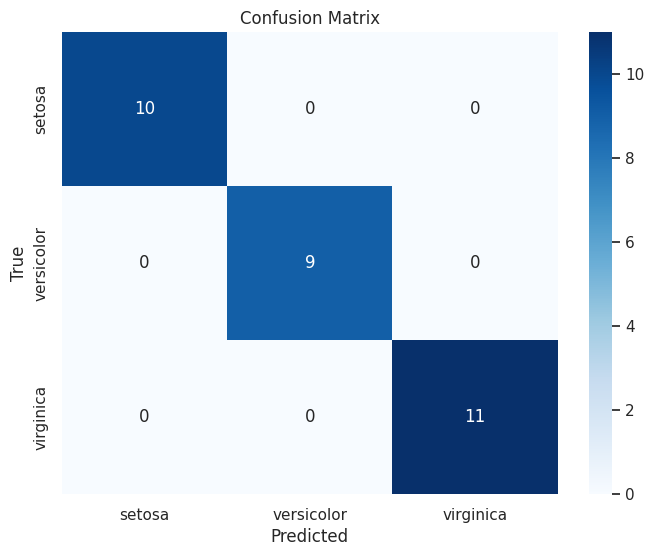

In [537]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# **5.Write down 10 differences between Descriptive statistics and inferential Statistics (Mandatory) **

---



1. Purpose
Descriptive Statistics: Summarizes and describes the features of a dataset. It provides simple summaries and visualizations.
Inferential Statistics: Makes inferences or predictions about a population based on a sample. It involves hypothesis testing, estimation, and making predictions.

2. Scope
Descriptive Statistics: Limited to the dataset at hand. It does not make generalizations beyond the data.
Inferential Statistics: Extends beyond the dataset to make conclusions about a larger population.

3. Data Summary
Descriptive Statistics: Includes measures like mean, median, mode, range, variance, and standard deviation. It also involves visualizations like histograms and pie charts.
Inferential Statistics: Involves statistical models and tests like t-tests, ANOVA, chi-square tests, regression analysis, and confidence intervals.

4. Nature of Analysis
Descriptive Statistics: Describes the characteristics of the data without making predictions.
Inferential Statistics: Uses sample data to make predictions or generalizations about a population.

5. Examples
Descriptive Statistics: Reporting the average score of a class on a test or the distribution of ages in a survey.
Inferential Statistics: Estimating the average height of all students in a school based on a sample or determining if a new teaching method is more effective than the old one.

6. Applications
Descriptive Statistics: Applied when you want to summarize and present data clearly and concisely.
Inferential Statistics: Applied when you need to make decisions or predictions based on data, such as in surveys, experiments, and research studies.

7. Techniques Used
Descriptive Statistics: Techniques include calculating summary statistics, frequency distributions, and creating graphical representations of data.
Inferential Statistics: Techniques include hypothesis testing, confidence intervals, and regression analysis.

8. Data Requirement
Descriptive Statistics: Can be performed with any dataset without needing additional information beyond the data itself.
Inferential Statistics: Requires assumptions about the data and often involves sampling techniques and probability distributions.

9. Decision Making
Descriptive Statistics: Provides information to understand the dataset but does not inform decision-making beyond the dataset.
Inferential Statistics: Provides a basis for making decisions and predictions about a larger population based on sample data.

10. Focus
Descriptive Statistics: Focuses on the "what" of the data—what is happening within the dataset.
Inferential Statistics: Focuses on the "why" and "how"—why certain patterns exist and how they can be generalized to a broader context.

Summary
Descriptive Statistics: Summarizes data from a sample or entire dataset.
Inferential Statistics: Makes predictions or generalizations about a population based on a sample.

# **6.How to handle missing values in machine learning ? Write a code (Mandatory) **

---



# **How to handle missing values:**

---



a. Fill it with mean (unskewed data), Median(skewed data), mode (categorical)

b. Omission:

Omit the row if missing values in the row are more (90%+)
Omit the column if missing values in the column are more (90%+)
eg: df.dropna()

c. Backward/Forward Fill:
df.bfill(), df.ffill()

In [538]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [539]:
df = pd.read_csv('/content/melb_data.csv')

In [540]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [542]:
df.shape

(13580, 21)

Check Null values

In [543]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

# Check percentage of Null Values

In [560]:
df.isnull().sum()/len(df)*100

Suburb            0.000000
Address           0.000000
Rooms             0.000000
Type              0.000000
Price             0.000000
Method            0.000000
SellerG           0.000000
Date              0.000000
Distance          0.000000
Postcode          0.000000
Bedroom2          0.000000
Bathroom          0.000000
Car               0.000000
Landsize          0.000000
BuildingArea      0.000000
YearBuilt         0.000000
CouncilArea      10.081001
Lattitude         0.000000
Longtitude        0.000000
Regionname        0.000000
Propertycount     0.000000
dtype: float64

In [562]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price            float64
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

In [563]:
# Drop rows where 'CouncilArea' is missing
df_cleaned = df.dropna(subset=['CouncilArea'])

In [564]:
# Verify that 'CouncilArea' no longer has missing values
print(df_cleaned['CouncilArea'].isnull().sum())

0


In [565]:
from sklearn.impute import SimpleImputer

# Impute missing values with median
imputer_median = SimpleImputer(strategy='median')
df['BuildingArea'] = imputer_median.fit_transform(df[['BuildingArea']])

# Verify that there are no missing values in 'BuildingArea'
print(df['BuildingArea'].isnull().sum())


0


In [566]:
from sklearn.impute import KNNImputer

# Create a KNN Imputer object
knn_imputer = KNNImputer(n_neighbors=5)
df[['Car']] = knn_imputer.fit_transform(df[['Car']])

# Verify that there are no missing values in 'Car'
print(df['Car'].isnull().sum())


0


In [567]:
# Forward fill followed by backward fill
df['YearBuilt'] = df['YearBuilt'].fillna(method='ffill').fillna(method='bfill')

# Verify that there are no missing values in 'Car'
print(df['YearBuilt'].isnull().sum())

0


In [568]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,126.0,1900.0,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,126.0,1900.0,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,126.0,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,126.0,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [571]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [581]:
# Backward fill missing values
df['CouncilArea'] = df['CouncilArea'].bfill()
# Verify the DataFrame
print("DataFrame after forward filling:")
print(df['CouncilArea'].value_counts())

DataFrame after forward filling:
CouncilArea
Moreland             1163
Boroondara           1160
Moonee Valley         997
Darebin               935
Glen Eira             848
Stonnington           719
Maribyrnong           692
Yarra                 647
Port Phillip          628
Banyule               594
Bayside               490
Melbourne             470
Hobsons Bay           434
Brimbank              424
Monash                333
Manningham            311
Whitehorse            304
Kingston              207
Whittlesea            167
Hume                  164
Wyndham                86
Knox                   80
Maroondah              80
Melton                 66
Frankston              53
Greater Dandenong      52
Casey                  38
Nillumbik              36
Yarra Ranges           18
Cardinia                8
Macedon Ranges          7
Unavailable             1
Moorabool               1
Name: count, dtype: int64


In [582]:
df.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                 0
Landsize            0
BuildingArea        0
YearBuilt           0
CouncilArea      1367
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [583]:
print(df['CouncilArea'].dtype)


object


In [584]:
print(df['CouncilArea'].isnull().sum())


1367


In [585]:
# Replace non-standard missing values with NaN
df['CouncilArea'].replace(['', 'NA', 'N/A', 'NULL'], np.nan, inplace=True)

# Choose an imputation method:
# Option 1: Forward Fill
df['CouncilArea'] = df['CouncilArea'].ffill()


In [586]:
df.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

# **7.Plot Any 3 visualizations (Mandatory)**

---



In [587]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

In [589]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [590]:
df['species'].head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

In [591]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

<Axes: xlabel='sepal length (cm)', ylabel='sepal width (cm)'>

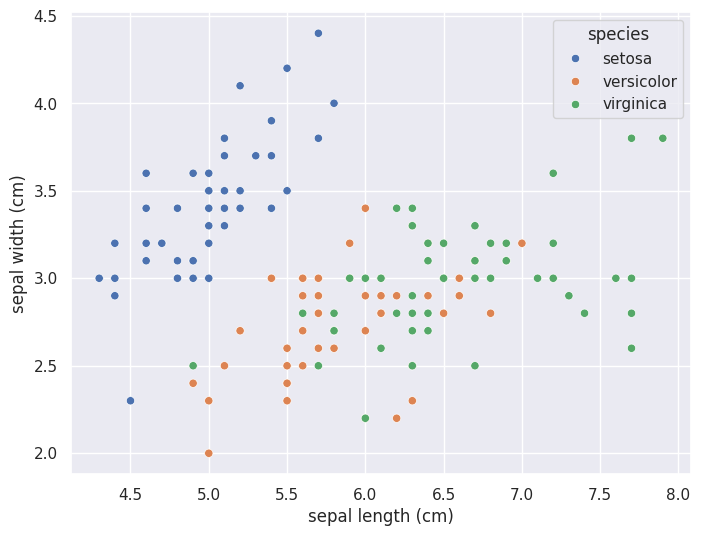

In [588]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', hue='species', data=df)

# **PAIR PLOT**

---



<Figure size 800x600 with 0 Axes>

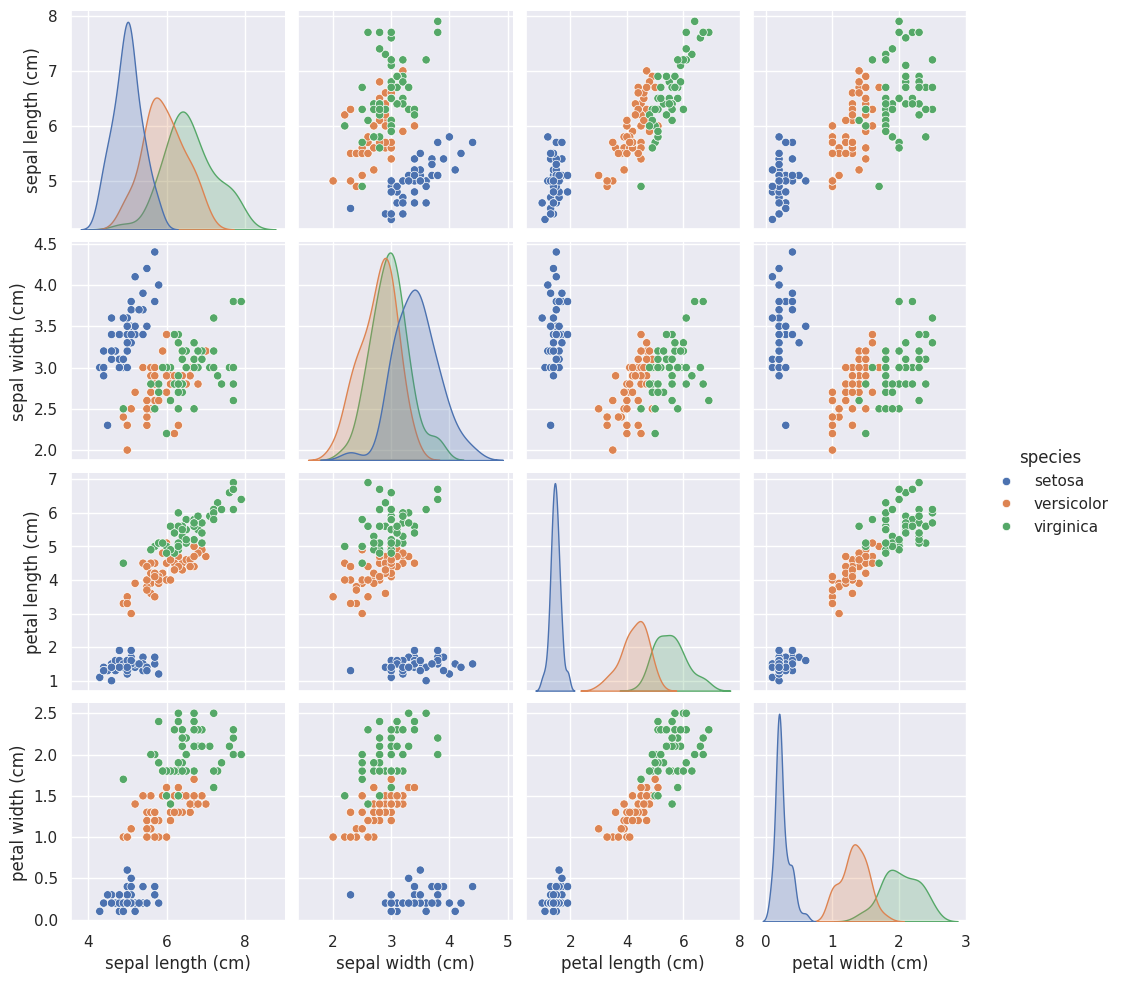

In [594]:
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue = 'species')

# **BAR PLOT**

---



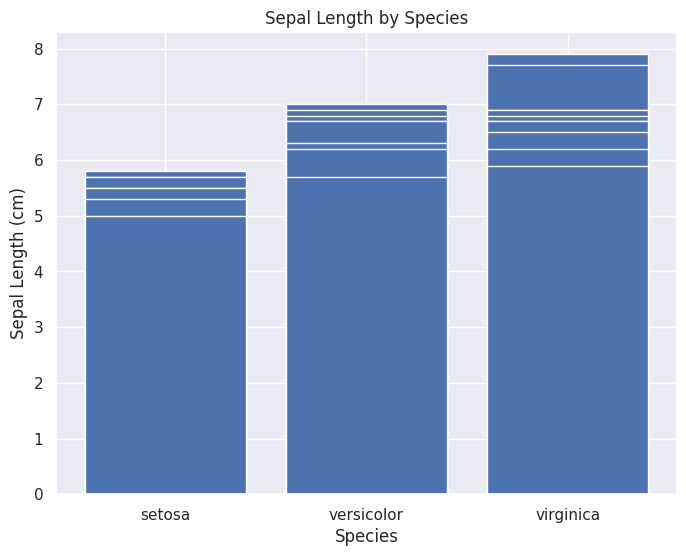

In [595]:
plt.figure(figsize=(8, 6))
plt.bar(df['species'], df['sepal length (cm)'])
plt.xlabel('Species')
plt.ylabel('Sepal Length (cm)')
plt.title('Sepal Length by Species')
plt.show()

# **PIEPLOT**

---



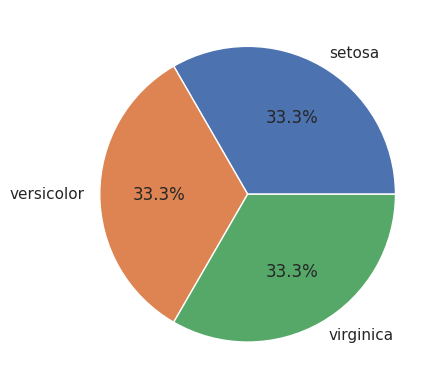

In [596]:
plt.pie(df['species'].value_counts(), labels=df['species'].unique(), autopct='%1.1f%%')
plt.show()

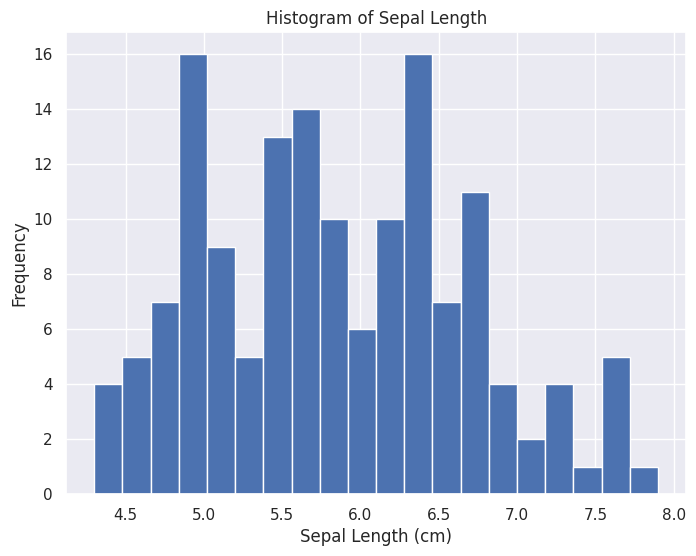

In [601]:
plt.figure(figsize=(8, 6))
plt.hist(df['sepal length (cm)'], bins=20)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Sepal Length')
plt.show()

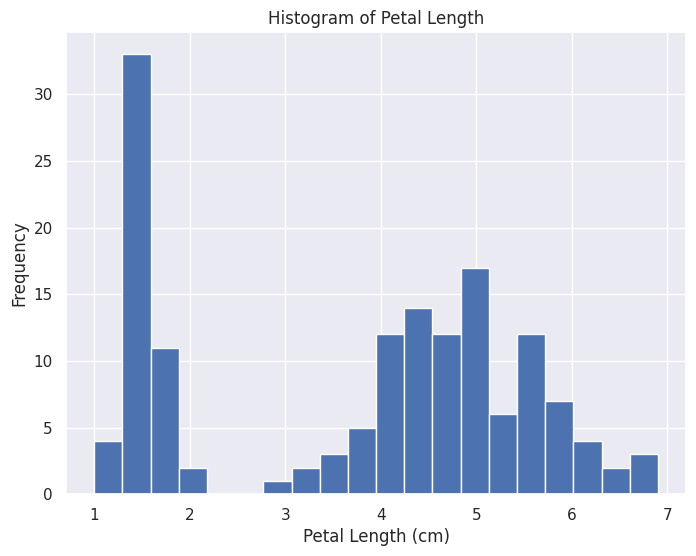

In [600]:
plt.figure(figsize=(8, 6))
plt.hist(df['petal length (cm)'], bins=20)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Frequency')
plt.title('Histogram of Petal Length')
plt.show()

<ipython-input-597-d932be150497>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['sepal length (cm)'], shade=True)


<Axes: xlabel='sepal length (cm)', ylabel='Density'>

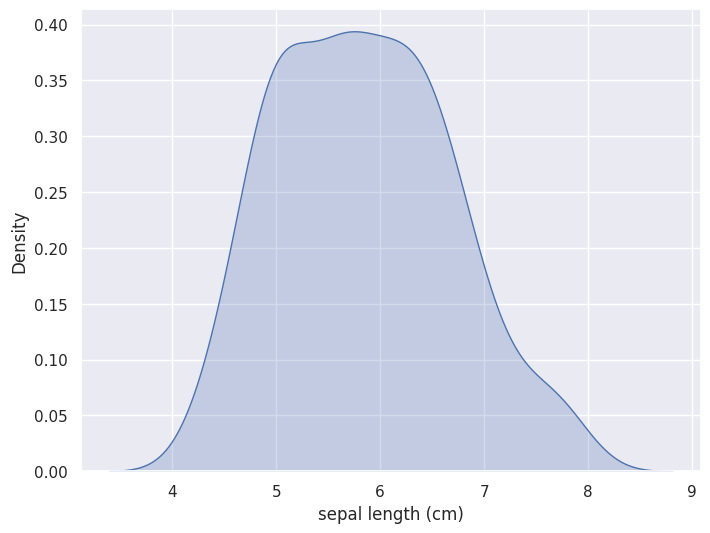

In [597]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['sepal length (cm)'], shade=True)